In [45]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [39]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
csv_file_path = r'D:\NUS\Y3S2\DSA3101\Project\Data\combined_data2.csv'
df = pd.read_csv(csv_file_path)
print(df.head())

   id                 UserName  \
0   1           Tiny Particles   
1   2  HetTienDownGameBanQuyen   
2   3                 Nrhdxtan   
3   4            OnTheRoad9988   
4   5          princesstazsdff   

                                              Review  Score             Date  \
0  The app is easy to navigate and optimise for p...      5   25/2/2024 7:24   
1  Extremely disappointed with the GXS app. Despi...      1   24/2/2024 6:12   
2  Show allow to increase amount not reduce and s...      1  21/2/2024 14:03   
3                           This app is easy to use.      5   10/2/2024 3:22   
4  When you asked your staff to write a 5* review...      1   18/1/2024 8:45   

       Bank  
0  GXS Bank  
1  GXS Bank  
2  GXS Bank  
3  GXS Bank  
4  GXS Bank  


In [41]:
sid = SentimentIntensityAnalyzer()

In [42]:
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Apply preprocessing and sentiment analysis
sentiment_scores = []
for index, row in df.iterrows():
    review = row['Review']
    tokens = preprocess_text(review)
    # Join tokens back into a string for sentiment analysis
    cleaned_review = ' '.join(tokens)
    # Perform sentiment analysis
    sentiment_score = sid.polarity_scores(cleaned_review)
    # Append sentiment score to the list
    sentiment_scores.append(sentiment_score)
    
print(sentiment_scores)

[{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}, {'neg': 0.396, 'neu': 0.538, 'pos': 0.066, 'compound': -0.9099}, {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.6705}, {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}, {'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'compound': 0.9601}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.304, 'pos': 0.696, 'compound': 0.9808}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.117, 'neu': 0.752, 'pos': 0.132, 'compound': 0.1027}, {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4939}, {'neg': 0.0, 'neu': 0.359, 'pos': 0.641, 'compound': 0.8658}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939}, {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.7003}, {'neg': 0.083, 'neu': 0.437, 'pos': 0.48, 'compound': 0.875}, {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6597}, {'neg': 0.0, 'neu'

In [43]:
# Add sentiment scores to DataFrame as separate columns
df['neg'] = [score['neg'] for score in sentiment_scores]
df['neu'] = [score['neu'] for score in sentiment_scores]
df['pos'] = [score['pos'] for score in sentiment_scores]
df['compound'] = [score['compound'] for score in sentiment_scores]

print(df.head())

   id                 UserName  \
0   1           Tiny Particles   
1   2  HetTienDownGameBanQuyen   
2   3                 Nrhdxtan   
3   4            OnTheRoad9988   
4   5          princesstazsdff   

                                              Review  Score             Date  \
0  The app is easy to navigate and optimise for p...      5   25/2/2024 7:24   
1  Extremely disappointed with the GXS app. Despi...      1   24/2/2024 6:12   
2  Show allow to increase amount not reduce and s...      1  21/2/2024 14:03   
3                           This app is easy to use.      5   10/2/2024 3:22   
4  When you asked your staff to write a 5* review...      1   18/1/2024 8:45   

       Bank    neg    neu    pos  compound  
0  GXS Bank  0.000  0.408  0.592    0.7003  
1  GXS Bank  0.396  0.538  0.066   -0.9099  
2  GXS Bank  0.000  0.683  0.317    0.6705  
3  GXS Bank  0.000  0.408  0.592    0.4404  
4  GXS Bank  0.000  0.402  0.598    0.9601  


In [44]:
def categorize_sentiment(score):
    if score >= 0.7: 
        return 'promoter'
    elif score >= 0.3:
        return 'passive'
    else:
        return 'detractor'

df['nps_category'] = df['compound'].apply(categorize_sentiment)

nps_scores = df.groupby('Bank')['nps_category'].value_counts(normalize=True).unstack().fillna(0)
nps_scores['nps'] = nps_scores['promoter'] - nps_scores['detractor']

# Print NPS scores for each bank
print("Net Promoter Scores (NPS) for each bank:")
print(nps_scores)

Net Promoter Scores (NPS) for each bank:
nps_category  detractor   passive  promoter       nps
Bank                                                 
GXS Bank       0.455696  0.294304  0.250000 -0.205696
Maribank       0.277778  0.344444  0.377778  0.100000
Revolut        0.381306  0.418398  0.200297 -0.181009
Trust          0.353053  0.297710  0.349237 -0.003817
Wise           0.305589  0.379310  0.315101  0.009512


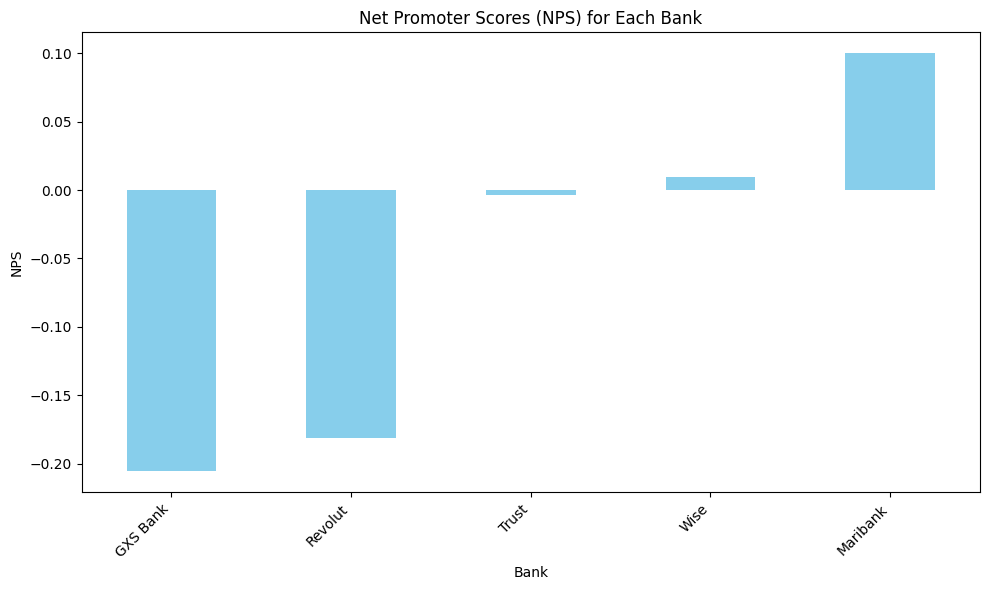

In [46]:
plt.figure(figsize=(10, 6))
nps_scores['nps'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Net Promoter Scores (NPS) for Each Bank')
plt.xlabel('Bank')
plt.ylabel('NPS')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [47]:
# Group by 'Bank' column and calculate mean sentiment score for each bank
mean_sentiment = df.groupby('Bank')['compound'].mean()

# Print mean sentiment score for each bank
print("Mean Sentiment Score for each bank:")
print(mean_sentiment)


Mean Sentiment Score for each bank:
Bank
GXS Bank    0.280748
Maribank    0.437547
Revolut     0.285872
Trust       0.370309
Wise        0.419665
Name: compound, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_2252\3581261507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bank', y='compound', data=df, palette='Set2')


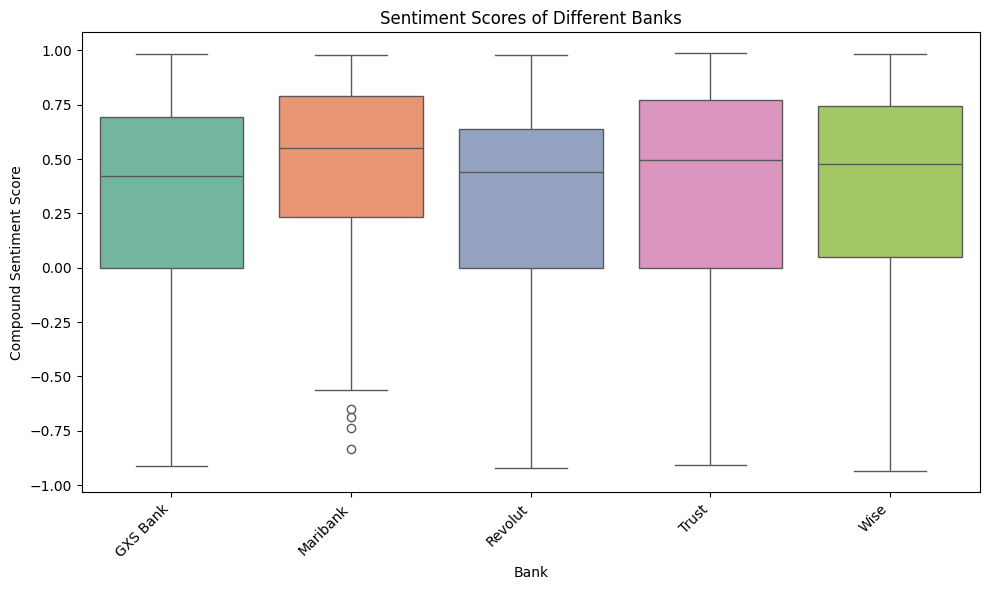

In [48]:
import seaborn as sns

# Box plot to visualize sentiment scores of different banks
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bank', y='compound', data=df, palette='Set2')
plt.title('Sentiment Scores of Different Banks')
plt.xlabel('Bank')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
